<a href="https://colab.research.google.com/github/Mahesh-Bandi/document-classification/blob/master/document-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [7]:
uploaded=files.upload()

Saving training.zip to training.zip


In [0]:
import os
import zipfile

local_zip = '/content/training.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()


In [14]:
uploaded=files.upload()


Saving validation.zip to validation.zip


In [0]:
import os
import zipfile

local_zip = '/content/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [16]:
documents_dir = os.path.join('/tmp/training/documents')
images_dir = os.path.join('/tmp/training/images')

print('total training rock images:', len(os.listdir(documents_dir)))
print('total training scissors images:', len(os.listdir(images_dir)))

document_files = os.listdir(documents_dir)
print(document_files[:10])

image_files = os.listdir(images_dir)
print(image_files[:10])

total training rock images: 54
total training scissors images: 50
['pan13.jfif', 'DL3.jfif', 'pan11.jfif', 'Voter ID7.jfif', 'DL16.jfif', 'pan3.jfif', 'voter ID2.jfif', 'Aadhar8.jfif', 'DL1.jfif', 'Voter ID10.jfif']
['img2.jfif', 'image39.png', 'img24.jfif', 'image35.jpg', 'img13.jfif', 'img12.jfif', 'image32.jpg', 'image40.png', 'img7.jfif', 'img9.jfif']


In [17]:
val_documents_dir = os.path.join('/tmp/validation/documents')
val_images_dir = os.path.join('/tmp/validation/images')

print('total training rock images:', len(os.listdir(val_documents_dir)))
print('total training scissors images:', len(os.listdir(val_images_dir)))

val_document_files = os.listdir(val_documents_dir)
print(val_document_files[:10])

val_image_files = os.listdir(val_images_dir)
print(val_image_files[:10])

total training rock images: 20
total training scissors images: 20
['DL14.jfif', 'Aadhar18.jfif', 'pan22.jfif', 'DL17.jfif', 'Aadhar7.jfif', 'DL18.jfif', 'pan21.jfif', 'Aadhar11.jfif', 'DL7.jfif', 'DL5.jfif']
['image45.png', 'img31.jfif', 'img34.jfif', 'img35.jfif', 'image43.png', 'img26.jfif', 'img33.jfif', 'img29.jfif', 'image52.jpg', 'image47.png']


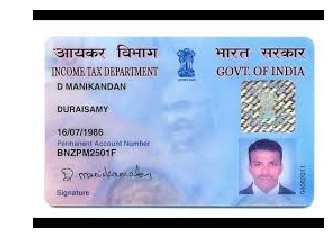

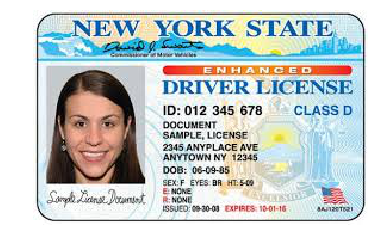

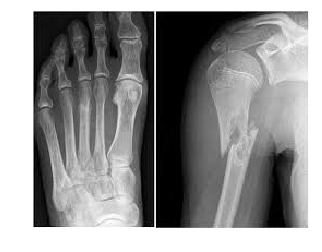

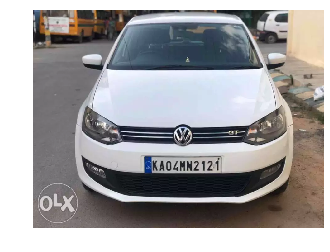

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_document = [os.path.join(documents_dir, fname) 
                for fname in document_files[pic_index-2:pic_index]]
next_image = [os.path.join(images_dir, fname) 
                for fname in image_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_document+next_image):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [21]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='binary'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()


Found 25 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
Epoch 1/25
1/1 [==============================] - 5s 5s/step - loss: 0.6992 - acc: 0.4400 - val_loss: 1.7764e-14 - val_acc: 1.0000
Epoch 2/25
Epoch 1/25
1/1 [==============================] - 0s 264ms/step - loss: 2.2091e-12 - acc: 1.0000 - val_loss: 1.7764e-14 - val_acc: 1.0000
Epoch 3/25
Epoch 1/25
1/1 [==============================] - 0s 410ms/step - loss: 5.0194e-14 - acc: 1.0000 - val_loss: 1.7764e-14 - val_acc: 1.0000
Epoch 4/25
Epoch 1/25
1/1 [==============================] - 0s 399ms/step - loss: 1.3872e-12 - acc: 1.0000 - val_loss: 1.7764e-14 - val_acc: 1.0000
Epoch 5/25
Epoch 1/25
1/1 [==============================] - 0s 460ms/step - loss: 6.8774e-13 - acc: 1.0000 - val_loss: 1.7764e-14 - val_acc: 1.0000
Epoch 6/25
Epoch 1/25
1/1 [==============================] - 0s 424ms/step - loss: 3.0061e-12 - acc: 1.0000 - val_loss: 1.7764e-14 - val_acc: 1.0000
Epoch 7/25
Epoch 1/